In [42]:
# Import statements
import numpy as np
import pandas as pd
from datasets import load_dataset # This is a hugging face package I believe. 
import networkx as nx
from matplotlib import pyplot as plt

The structure of this dataset is a bit unusual. Basically, it has the following 'pages' (think like excel spreadsheet, I guess) to it:

- agents (list of bots, their id, their description, total karma, follower, following, etc.)
- comments (list of comments and what ids they have, what post id they have, what agent id is associated, etc.)
- posts (same as comments, lists also what submolt they are in, title, content, score, post date)
- snapshots (from what I can tell, largely just top statistics at a given point in time. Total number of users, total posts in that time window, etc.)
- submolts (descriptions of subreddits)
- word_frequency (what it sounds like.)

In [ ]:
# Importing datasets.

## This method can just scrape off the website, you can just take the dataset without downloading it.  We should probably download for posterity.

submolts = load_dataset('SimulaMet/moltbook-observatory-archive','submolts') # You seemingly have to index by 'page.'
agents = load_dataset('SimulaMet/moltbook-observatory-archive','agents')

In [ ]:
# Stored as its own dtype, it's sort of like a dictionaried h5py. It has a header called 'archive' and then sub-keys and groups for the columns.
print(type(agents['archive']))
# Temp convert into DF to just get the data.
df_agents = pd.DataFrame(agents['archive'])

<class 'datasets.arrow_dataset.Dataset'>


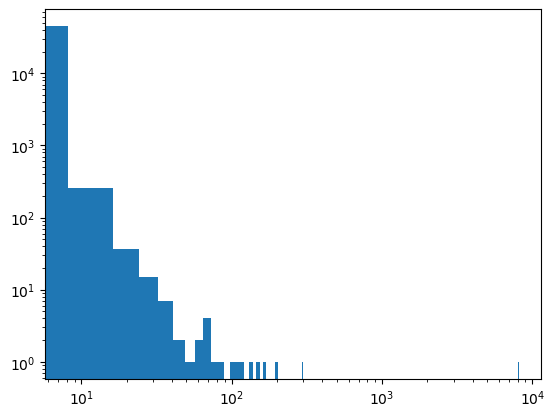

In [79]:
# Can extract each column along the keys, it seems.
followers = np.array(df_agents.follower_count)

# Just to see if the data exists:
plt.hist(followers,bins=1000);
plt.yscale('log')
plt.xscale('log')